#Results from original paper

In the comparison of chest X-rays presenting as pneumonia versus normal, we achieved an accuracy of **92.8%**, with a sensitivity of **93.2%** and a specificity of **90.1%**. The area under the ROC curve for detection of pneumonia from normal was **96.8%** (Figure 6E). Binary comparison of bacterial and viral pneumonia resulted in a test accuracy of **90.7%**, with a sensitivity of **88.6%** and a specificity of **90.9%** (Figures 6C and 6D). The area under the ROC curve for distinguishing bacterial and viral pneumonia was** 94.0%** (Figure 6F).

#Conclusion
First results with keras and tensorflow were much worse than original paper results(above). I think it's connected with data preprocessing. I tried to apply Transfer Learning models (mobilenet and VGG16) for this task in keras. for both 3 classes task and 2 classes(pneumonia vs normal), results in these cases were pretty low and confusion matrixes show that it's a lot of false predictions. The same situation was in the case without transfer learning.

The second library Fast.ai demonstrated very good results close to results in the paper, especially in 2 classes case normal vs pneumonia and bacterial vs virus.

For 3 classes: accuracy was **70.9%** - not so good, but confusion matrix looks better than with TensorFlow.

For 2 classes normal vs pneumonia: 
* roc_auc: **90.0%**
* sensitivity: **98.7%** 
* specificity: **81.2%**

For 2 classes bacterial vs virus: 
* roc_auc: **91.4%**
* sensitivity:**84.5%** 
* specificity: **98.3%**

In this project I used the same split on train and test like in the original paper.


As we can see results with fast.ai library and I think it's connected with much better-preprocessing algorithms included in this library.
The main problem of this data that classifiers can't get a good prediction for 3 classes. I think it connect with a high similarity between classes.The final results for 2 classes classifications are relatively close to results in the paper. In my opinion, for next improving the results it's needed to have domain knowledge in medical imaging and roentgenology for high level data preprocessing.

*In conclusion, I want to mention that my results are close to the results in the article, and this means that the results of the article are reproduced.*

#google drive data

https://drive.google.com/file/d/15hFTDeLnRisHzEsJAyzaG7pbtDhTrEL8/view?usp=sharing 

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip 'drive/My Drive/Colab Notebooks/xray_data/chest-xray-pneumonia.zip'


Archive:  drive/My Drive/Colab Notebooks/xray_data/chest-xray-pneumonia.zip
  inflating: chest_xray.zip          


In [0]:
!unzip chest_xray.zip

Archive:  chest_xray.zip
   creating: chest_xray/
  inflating: chest_xray/.DS_Store    
   creating: __MACOSX/
   creating: __MACOSX/chest_xray/
  inflating: __MACOSX/chest_xray/._.DS_Store  
   creating: chest_xray/test/
  inflating: chest_xray/test/.DS_Store  
   creating: __MACOSX/chest_xray/test/
  inflating: __MACOSX/chest_xray/test/._.DS_Store  
   creating: chest_xray/test/PNEUMONIA/
  inflating: chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg  
   creating: __MACOSX/chest_xray/test/PNEUMONIA/
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person147_bacteria_706.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_482.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person78_bacteria_382.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUM

##1.2GB of chest X-ray images from children(5865 images)
   "pneumonia kills about 2 million children under 5 years old every year and is consistently estimated as the single leading cause of childhood mortality (Rudan et al., 2008), killing more children than HIV/AIDS, malaria, and measles combined (Adegbola, 2012). "

In [0]:
import imageio
import matplotlib.pyplot as plt
norm1 = imageio.imread('chest_xray/test/NORMAL/IM-0001-0001.jpeg')
pneum1 = imageio.imread('chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg')
pneum1_vir = imageio.imread('chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg')

###normal chest

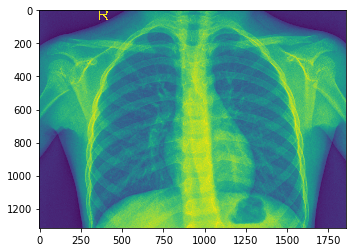

In [0]:
plt.imshow(norm1)


###bacterial pneumonia chest

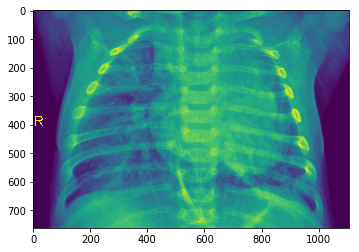

In [0]:
plt.imshow(pneum1)

###virus pneumonia chest

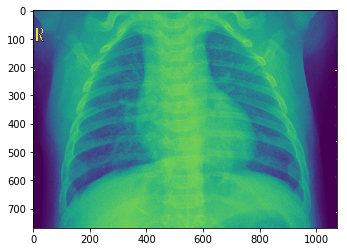

In [0]:
plt.imshow(pneum1_vir)

In [0]:
import numpy as np
import os
from pathlib import Path
import tensorflow as tf
from keras import backend as K

# Set the seed for hash based operations in python
os.environ['PYTHONHASHSEED'] = '0'

# Set the numpy seed
np.random.seed(111)
# Set the random seed in tensorflow at graph level
tf.set_random_seed(111)
# Define a tensorflow session with above session configs
sess = tf.Session(graph=tf.get_default_graph())

# Set the session in keras
K.set_session(sess)


Using TensorFlow backend.


##Move data to create the labels (and apply ImageDataGenerator)

In [0]:

                  # Define path to the data directory
data_dir = Path('chest_xray/')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'

# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

In [0]:
import pandas as pd
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases_virus = pneumonia_cases_dir.glob('*virus*')
pneumonia_cases_bacteria = pneumonia_cases_dir.glob('*bacteria*')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1 for bacteria pneumonia and 2 vor virus
for img in pneumonia_cases_bacteria:
    train_data.append((img, 1))
for img in pneumonia_cases_virus:
    train_data.append((img, 2))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,chest_xray/train/PNEUMONIA/person301_bacteria_...,1
1,chest_xray/train/NORMAL/NORMAL2-IM-1245-0001.jpeg,0
2,chest_xray/train/PNEUMONIA/person2_bacteria_4....,1
3,chest_xray/train/NORMAL/NORMAL2-IM-0777-0001.jpeg,0
4,chest_xray/train/PNEUMONIA/person66_bacteria_3...,1


In [0]:
train_data['label'].unique()

array([0, 1, 2])

In [0]:
import pandas as pd
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir_val = val_dir / 'NORMAL'
pneumonia_cases_dir_val = val_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases_val = normal_cases_dir_val.glob('*.jpeg')
pneumonia_cases_virus_val = pneumonia_cases_dir_val.glob('*virus*')
pneumonia_cases_bacteria_val = pneumonia_cases_dir_val.glob('*bacteria*')

# An empty list. We will insert the data into this list in (img_path, label) format
val_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases_val:
    val_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1 for bacteria pneumonia and 2 vor virus
for img in pneumonia_cases_bacteria_val:
    val_data.append((img, 1))
for img in pneumonia_cases_virus_val:
    val_data.append((img, 2))

# Get a pandas dataframe from the data we have in our list 
val_data = pd.DataFrame(val_data, columns=['image', 'label'],index=None)

# Shuffle the data 
val_data = val_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
val_data.head()

,image,label
0,chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg,0
1,chest_xray/val/PNEUMONIA/person1947_bacteria_4...,1
2,chest_xray/val/PNEUMONIA/person1952_bacteria_4...,1
3,chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg,0
4,chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg,0


In [0]:
import pandas as pd
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir_test = test_dir / 'NORMAL'
pneumonia_cases_dir_test = test_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases_test = normal_cases_dir_test.glob('*.jpeg')
pneumonia_cases_virus_test = pneumonia_cases_dir_test.glob('*virus*')
pneumonia_cases_bacteria_test = pneumonia_cases_dir_test.glob('*bacteria*')

# An empty list. We will insert the data into this list in (img_path, label) format
test_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases_test:
    test_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1 for bacteria pneumonia and 2 vor virus
for img in pneumonia_cases_bacteria_test:
    test_data.append((img, 1))
for img in pneumonia_cases_virus_test:
    test_data.append((img, 2))

# Get a pandas dataframe from the data we have in our list 
test_data = pd.DataFrame(test_data, columns=['image', 'label'],index=None)

# Shuffle the data 
test_data = test_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
test_data.head()

,image,label
0,chest_xray/test/PNEUMONIA/person145_bacteria_6...,1
1,chest_xray/test/PNEUMONIA/person1661_virus_287...,2
2,chest_xray/test/PNEUMONIA/person114_bacteria_5...,1
3,chest_xray/test/PNEUMONIA/person1667_virus_288...,2
4,chest_xray/test/NORMAL/NORMAL2-IM-0364-0001.jpeg,0


In [0]:

train_data= pd.DataFrame(train_data, dtype='str')
val_data= pd.DataFrame(val_data, dtype='str')
test_data= pd.DataFrame(test_data, dtype='str')
train_data=pd.concat([train_data,val_data])

In [0]:
print(train_data.shape)
batch_size=32

(5232, 2)


In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5232 entries, 0 to 15
Data columns (total 2 columns):
image    5232 non-null object
label    5232 non-null int64
dtypes: int64(1), object(1)
memory usage: 122.6+ KB


In [0]:
# from keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#         rotation_range=10,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')
# train_generator = train_datagen.flow_from_dataframe(dataframe = train_data,x_col='image', y_col='label',
#                                                     class_mode = 'categorical', batch_size = batch_size)

In [0]:
# os.mkdir('chest_xray/test/BACTERIA')
# movefile('chest_xray/test/PNEUMONIA/', [i for i in os.listdir('chest_xray/test/PNEUMONIA/') if 'bacteria' in i], 'chest_xray/test/BACTERIA/')
# os.rename('chest_xray/test/PNEUMONIA', 'chest_xray/test/VIRUS')
# os.mkdir('chest_xray/train/BACTERIA') 
# movefile('chest_xray/train/PNEUMONIA/', [i for i in os.listdir('chest_xray/train/PNEUMONIA/') if 'bacteria' in i], 'chest_xray/train/BACTERIA/')
# os.rename('chest_xray/train/PNEUMONIA', 'chest_xray/train/VIRUS')
# os.rename('chest_xray/val/PNEUMONIA', 'chest_xray/val/BACTERIA')

## How mach elements in each class of train data

In [0]:
import matplotlib.pyplot as plt

In [0]:
tr_norm_count = len([i for i in os.listdir('chest_xray/train/NORMAL')])


In [0]:
tr_pneum_bac_count = len([i for i in os.listdir('chest_xray/train/PNEUMONIA/ if "bacteria" in i')])

In [0]:
tr_pneum_vir_count = len([i for i in os.listdir('chest_xray/train/PNEUMONIA/ if "virus" in i)])

In [0]:
tr_norm_count, tr_pneum_bac_count, tr_pneum_vir_count

(1342, 2530, 1346)

In [0]:
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

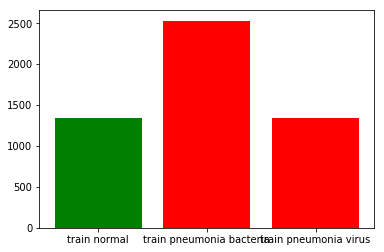

In [0]:
plt.bar(['train normal', 'train pneumonia bacteria', 'train pneumonia virus'],[tr_norm_count, tr_pneum_bac_count, tr_pneum_vir_count], color = ['g','r','r'])


<BarContainer object of 2 artists>

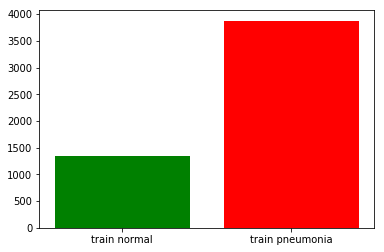

In [0]:
plt.bar(['train normal', 'train pneumonia'],[tr_norm_count, tr_pneum_bac_count + tr_pneum_vir_count], color = ['g','r'])

In [0]:
(tr_pneum_bac_count+ tr_pneum_vir_count)/tr_norm_count

2.8882265275707897

In [0]:
train_data.head()

,image,label
0,chest_xray/train/PNEUMONIA/person75_bacteria_3...,1
1,chest_xray/train/PNEUMONIA/person509_virus_102...,2
2,chest_xray/train/PNEUMONIA/person1400_bacteria...,1
3,chest_xray/train/PNEUMONIA/person60_bacteria_2...,1
4,chest_xray/train/NORMAL/IM-0115-0001.jpeg,0


##Data preprocessing

###ImageDataGenerator


In [0]:
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train,val = train_test_split(train_data, random_state = 111, test_size=0.33)

In [0]:
train.shape, val.shape

((3505, 2), (1727, 2))

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
        rotation_range=5,
        width_shift_range=0.3,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
train_generator = train_datagen.flow_from_dataframe(dataframe = train,x_col='image', y_col='label',target_size=(224,224),
                                                   color_mode='rgb', class_mode = 'categorical', 
                                                  batch_size = batch_size,
                                                 shuffle=True)

Found 3494 images belonging to 3 classes.


In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator=val_datagen.flow_from_dataframe(dataframe = val,x_col='image', y_col='label',target_size=(224,224),
                                                   color_mode='rgb', class_mode = 'categorical', 
                                                  batch_size = batch_size,
                                                 shuffle=False)

Found 1722 images belonging to 3 classes.


In [0]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=test_datagen.flow_from_dataframe(dataframe = test_data ,x_col='image', y_col='label',target_size=(224,224),
                                                   color_mode='rgb', class_mode = 'categorical', 
                                                  batch_size = batch_size,
                                                 shuffle=False)

Found 624 images belonging to 3 classes.


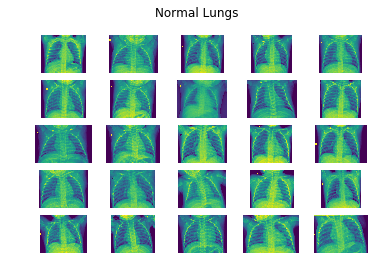

In [0]:
import random
import os
import matplotlib.pyplot as plt
normal_img = os.listdir('chest_xray/train/NORMAL/')
random = random.sample(normal_img,25)
f,ax = plt.subplots(5,5)

for i in range(0,25):
    im = plt.imread('chest_xray/train/NORMAL/'+random[i])
    ax[i//5,i%5].imshow(im)
    ax[i//5,i%5].axis('off')
f.suptitle('Normal Lungs')
plt.show()

##Neuralnet


In [0]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras.models import Sequential
from keras import regularizers
base_model=MobileNet( weights='imagenet',include_top=False,input_shape=(224,224,3)) #imports the mobilenet model and discards the last 1000 neuron layer.

In [0]:
x=base_model.output
# x=Conv2D(32, (2,2), activation = 'relu', kernel_regularizer=regularizers.l2(0.03), bias_regularizer=regularizers.l2(0.01))(x)
# # x=MaxPool2D(2, 2)(x)
# x=Conv2D(16, (2,2), activation = 'relu', kernel_regularizer=regularizers.l2(0.03), bias_regularizer=regularizers.l2(0.01))(x)
# # x=MaxPool2D(2, 2)(x)
x=GlobalAveragePooling2D()(x)

# x=Dense(512,activation='relu', kernel_regularizer=regularizers.l2(0.005), bias_regularizer=regularizers.l2(0.01))(x)
# x=Dropout(0.1)(x)
# x=Dense(128,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.

# x=Dense(64,activation='relu', kernel_regularizer=regularizers.l2(0.05), bias_regularizer=regularizers.l2(0.05))(x) #dense layer 2

x=Dense(12,activation='relu', kernel_regularizer=regularizers.l2(0.05), bias_regularizer=regularizers.l2(0.05))(x) #dense layer 3

preds=Dense(3,activation='softmax')(x) #final layer with softmax activation


In [0]:
model=Model(inputs=base_model.input,outputs=preds)
for layer in model.layers[:-2]:
    layer.trainable=False
for layer in model.layers[-2:]:
    layer.trainable=True

In [0]:
from keras.optimizers import Adam
from keras.callbacks import  EarlyStopping
import keras

Adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-5, amsgrad=False)
# es = EarlyStopping(patience=3)
Adam

In [0]:
model.compile(optimizer=Adam,loss='categorical_crossentropy',metrics=['accuracy'],)
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [0]:
step_size_train=train_generator.n//train_generator.batch_size
step_size_test=test_generator.n//test_generator.batch_size
#viszualization

# img_path='chest_xray/val/BACTERIA/person1946_bacteria_4874.jpeg'
# img = image.load_img(img_path,target_size=(224,224))


# img_tensor = image.img_to_array(img)
# img_tensor = np.expand_dims(img_tensor, axis=0)
# img_tensor /= 255.
# plt.imshow(img_tensor[0])
# plt.show()
# print(img_tensor.shape)


In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, EarlyStopping(patience=5, monitor='val_loss')]

In [0]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=step_size_train,
                            validation_data=val_generator,validation_steps=step_size_test,callbacks=callbacks_list,epochs=50)

Epoch 1/50
109/109 [==============================] - 90s 822ms/step - loss: 1.4972 - acc: 0.6749 - val_loss: 1.2545 - val_acc: 0.6497

Epoch 00001: val_loss improved from inf to 1.25454, saving model to weights-improvement-01-0.65.hdf5
Epoch 2/50
109/109 [==============================] - 80s 736ms/step - loss: 0.8876 - acc: 0.7503 - val_loss: 0.9517 - val_acc: 0.6711

Epoch 00002: val_loss improved from 1.25454 to 0.95168, saving model to weights-improvement-02-0.67.hdf5
Epoch 3/50
109/109 [==============================] - 83s 759ms/step - loss: 0.7375 - acc: 0.7568 - val_loss: 1.0419 - val_acc: 0.5938

Epoch 00003: val_loss did not improve from 0.95168
Epoch 4/50
109/109 [==============================] - 83s 763ms/step - loss: 0.6963 - acc: 0.7517 - val_loss: 0.9696 - val_acc: 0.5806

Epoch 00004: val_loss did not improve from 0.95168
Epoch 5/50
109/109 [==============================] - 84s 768ms/step - loss: 0.6661 - acc: 0.7681 - val_loss: 0.7737 - val_acc: 0.7458

Epoch 00005:

In [0]:
predgen_mobilenet_val = model.predict_generator(val_generator, steps=len(val_generator), verbose=1) 
predgen_mobilenet_val_argmax = np.argmax(predgen_mobilenet_val,axis = 1)
y_val=val_generator.classes

predgen_mobilenet = model.predict_generator(test_generator, steps=len(test_generator), verbose=1) 
predgen_mobilenet_argmax = np.argmax(predgen_mobilenet,axis = 1)
y_true=test_generator.classes

20/20 [==============================] - 7s 363ms/step


In [0]:
import h5py

hf = h5py.File('data_xray_val_test_3classes.h5', 'w')

hf.create_dataset('vel_pred_3classes', data=predgen_mobilenet_val, compression="gzip", compression_opts=9)
hf.create_dataset('y_val_true_3classes', data=y_val, compression="gzip", compression_opts=9)
hf.create_dataset('test_pred_3classes', data=predgen_mobilenet, compression="gzip", compression_opts=9)
hf.create_dataset('y_test_true_3classes', data=y_true, compression="gzip", compression_opts=9)


hf.close()

CURRENT PREDICTION 3 classes mobilenet

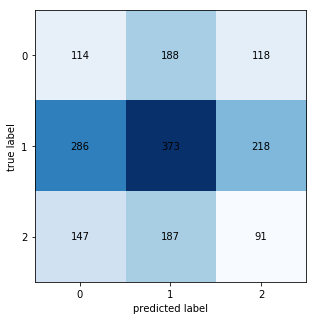

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
CM = confusion_matrix(y_val, predgen_mobilenet_val_argmax)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#Transfer Learnin MobileNet binary classification

##Normal vs Pneumonia

In [0]:

                  # Define path to the data directory
data_dir = Path('chest_xray/')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'

# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

In [0]:
import pandas as pd
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases_binary = pneumonia_cases_dir.glob('*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1 for bacteria pneumonia and 2 vor virus
for img in pneumonia_cases_binary:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,chest_xray/train/NORMAL/IM-0757-0001.jpeg,0
1,chest_xray/train/NORMAL/IM-0228-0001.jpeg,0
2,chest_xray/train/PNEUMONIA/person383_bacteria_...,1
3,chest_xray/train/PNEUMONIA/person470_bacteria_...,1
4,chest_xray/train/NORMAL/IM-0525-0001-0002.jpeg,0


In [0]:
import pandas as pd
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir_val = val_dir / 'NORMAL'
pneumonia_cases_dir_val = val_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases_val = normal_cases_dir_val.glob('*.jpeg')
pneumonia_cases_binary_val = pneumonia_cases_dir_val.glob('*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
val_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases_val:
    val_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1 for bacteria pneumonia and 2 vor virus
for img in pneumonia_cases_binary_val:
    val_data.append((img, 1))
# Get a pandas dataframe from the data we have in our list 
val_data = pd.DataFrame(val_data, columns=['image', 'label'],index=None)

# Shuffle the data 
val_data = val_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
val_data.head()

,image,label
0,chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg,0
1,chest_xray/val/PNEUMONIA/person1949_bacteria_4...,1
2,chest_xray/val/PNEUMONIA/person1952_bacteria_4...,1
3,chest_xray/val/PNEUMONIA/person1954_bacteria_4...,1
4,chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg,0


In [0]:
import pandas as pd
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir_test = test_dir / 'NORMAL'
pneumonia_cases_dir_test = test_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases_test = normal_cases_dir_test.glob('*.jpeg')
pneumonia_cases_binary_test = pneumonia_cases_dir_test.glob('*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
test_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases_test:
    test_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1 for bacteria pneumonia and 2 vor virus
for img in pneumonia_cases_binary_test:
    test_data.append((img, 1))
# Get a pandas dataframe from the data we have in our list 
test_data = pd.DataFrame(test_data, columns=['image', 'label'],index=None)

# Shuffle the data 
test_data = test_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
test_data.head()

,image,label
0,chest_xray/test/PNEUMONIA/person95_bacteria_46...,1
1,chest_xray/test/PNEUMONIA/person1664_virus_287...,1
2,chest_xray/test/NORMAL/NORMAL2-IM-0294-0001.jpeg,0
3,chest_xray/test/PNEUMONIA/person1675_virus_289...,1
4,chest_xray/test/PNEUMONIA/person112_bacteria_5...,1


In [0]:

train_data= pd.DataFrame(train_data, dtype='str')
val_data= pd.DataFrame(val_data, dtype='str')
test_data= pd.DataFrame(test_data, dtype='str')

In [0]:
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train,val = train_test_split(train_data, random_state = 111, test_size=0.33)

In [0]:
train.shape, val.shape

((3494, 2), (1722, 2))

In [0]:
batch_size=32

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
        rotation_range=5,
        width_shift_range=0.3,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
train_generator = train_datagen.flow_from_dataframe(dataframe = train,x_col='image', y_col='label',target_size=(224,224),
                                                   color_mode='rgb', class_mode = 'categorical', 
                                                  batch_size = batch_size,
                                                 shuffle=True)

Found 3494 images belonging to 2 classes.


In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator=val_datagen.flow_from_dataframe(dataframe = val,x_col='image', y_col='label',target_size=(224,224),
                                                   color_mode='rgb', class_mode = 'categorical', 
                                                  batch_size = batch_size,
                                                 shuffle=False)

Found 1722 images belonging to 2 classes.


In [0]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=test_datagen.flow_from_dataframe(dataframe = test_data ,x_col='image', y_col='label',target_size=(224,224),
                                                   color_mode='rgb', class_mode = 'categorical', 
                                                  batch_size = batch_size,
                                                 shuffle=False)

Found 624 images belonging to 2 classes.


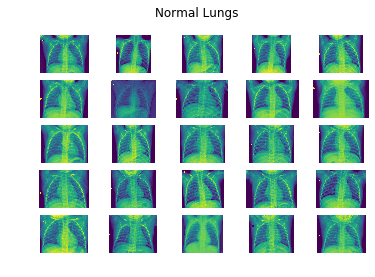

In [0]:
import random
import os
import matplotlib.pyplot as plt
normal_img = os.listdir('chest_xray/train/NORMAL/')
random = random.sample(normal_img,25)
f,ax = plt.subplots(5,5)

for i in range(0,25):
    im = plt.imread('chest_xray/train/NORMAL/'+random[i])
    ax[i//5,i%5].imshow(im)
    ax[i//5,i%5].axis('off')
f.suptitle('Normal Lungs')
plt.show()

In [0]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.models import Sequential

base_model=MobileNet( weights='imagenet',include_top=False,input_shape=(224,224,3)) #imports the mobilenet model and discards the last 1000 neuron layer.

In [0]:
x=base_model.output
x=GlobalAveragePooling2D()(x)

# x=Dense(128,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
# x=Dropout(0.2)(x)
# x=Dense(64,activation='relu')(x) #dense layer 2
x=Dense(12,activation='relu', kernel_regularizer=regularizers.l2(0.05), bias_regularizer=regularizers.l2(0.05))(X)

preds=Dense(2,activation='softmax')(x) #final layer with softmax activation


NameError: ignored

In [0]:
model=Model(inputs=base_model.input,outputs=preds)
for layer in model.layers[:-2]:
    layer.trainable=False
for layer in model.layers[-2:]:
    layer.trainable=True

In [0]:
from keras.optimizers import Adam
from keras.callbacks import  EarlyStopping
import keras
Adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-5, amsgrad=False)
# es = EarlyStopping(patience=3)
Adam

In [0]:
model.compile(optimizer=Adam,loss='binary_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy
model.summary()

In [0]:
step_size_train=train_generator.n//train_generator.batch_size
step_size_test=test_generator.n//test_generator.batch_size
#viszualization

# img_path='chest_xray/val/BACTERIA/person1946_bacteria_4874.jpeg'
# img = image.load_img(img_path,target_size=(224,224))


# img_tensor = image.img_to_array(img)
# img_tensor = np.expand_dims(img_tensor, axis=0)
# img_tensor /= 255.
# plt.imshow(img_tensor[0])
# plt.show()
# print(img_tensor.shape)


In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, EarlyStopping(patience=5, monitor='val_loss')]

In [0]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=step_size_train,
                            validation_data=val_generator,validation_steps=step_size_test,callbacks=callbacks_list,epochs=30)

Epoch 1/30
163/163 [==============================] - 126s 771ms/step - loss: 0.1304 - acc: 0.9490 - val_loss: 0.3404 - val_acc: 0.8487

Epoch 00001: val_loss improved from inf to 0.34042, saving model to weights-improvement-01-0.85.hdf5
Epoch 2/30
163/163 [==============================] - 120s 738ms/step - loss: 0.1419 - acc: 0.9435 - val_loss: 0.3571 - val_acc: 0.8536

Epoch 00002: val_loss did not improve from 0.34042
Epoch 3/30
163/163 [==============================] - 122s 748ms/step - loss: 0.1159 - acc: 0.9571 - val_loss: 0.4176 - val_acc: 0.8123

Epoch 00003: val_loss did not improve from 0.34042
Epoch 4/30
163/163 [==============================] - 120s 739ms/step - loss: 0.1181 - acc: 0.9542 - val_loss: 0.3204 - val_acc: 0.8470

Epoch 00004: val_loss improved from 0.34042 to 0.32041, saving model to weights-improvement-04-0.85.hdf5
Epoch 5/30
163/163 [==============================] - 119s 728ms/step - loss: 0.1147 - acc: 0.9549 - val_loss: 0.4780 - val_acc: 0.8174

Epoch 0

In [0]:
predgen_mobilenet_val_norm_vs_pneum = model.predict_generator(val_generator, steps=len(val_generator), verbose=1) 
predgen_mobilenet_val_norm_vs_pneum_argmax = np.argmax(predgen_mobilenet_val_norm_vs_pneum,axis = 1)
y_val_norm_vs_pneum=val_generator.classes

predgen_mobilenet_norm_vs_pneum = model.predict_generator(test_generator, steps=len(test_generator), verbose=1) 
predgen_mobilenet_norm_vs_pneum_argmax = np.argmax(predgen_mobilenet_norm_vs_pneum,axis = 1)
y_true_norm_vs_pneum=test_generator.classes

20/20 [==============================] - 7s 359ms/step


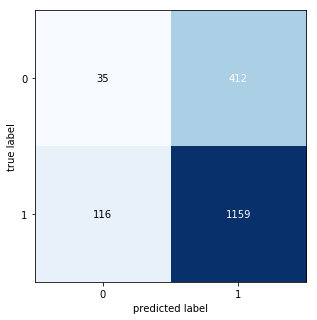

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
CM = confusion_matrix(y_val_norm_vs_pneum, predgen_mobilenet_val_norm_vs_pneum_argmax)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [0]:
import h5py

hf = h5py.File('data_xray_val_test_norm_vs_pneum.h5', 'w')

hf.create_dataset('vel_pred_norm_vs_pneum', data=predgen_mobilenet_val_norm_vs_pneum, compression="gzip", compression_opts=9)
hf.create_dataset('y_val_true_norm_vs_pneum', data=y_val_norm_vs_pneum, compression="gzip", compression_opts=9)
hf.create_dataset('test_pred_norm_vs_pneum', data=predgen_mobilenet_norm_vs_pneum, compression="gzip", compression_opts=9)
hf.create_dataset('y_test_true_norm_vs_pneum', data=y_true_norm_vs_pneum, compression="gzip", compression_opts=9)


hf.close()

In [0]:
predgen_2classes_norm_vs_pneum = model.predict_generator(val_generator, steps=len(val_generator), verbose=1) 
predgen_2classes_norm_vs_pneum_1axis = np.argmax(predgen_2classes_norm_vs_pneum,axis = 1)
y_val=val_generator.classes

44/44 [==============================] - 245s 6s/step


In [0]:
predgen_pneumvsall = model.predict_generator(test_generator, steps=len(test_generator), verbose=1) 
pred_pneumvsall = np.argmax(predgen_pneumvsall,axis = 1)
y_pneumvsnorm=test_generator.classes

16/16 [==============================] - 91s 6s/step


CURRENT PREDICTION

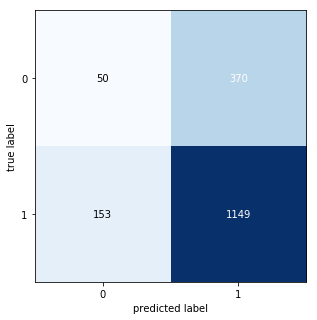

In [0]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#Bacterial vs all

In [0]:

                  # Define path to the data directory
data_dir = Path('chest_xray/')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'

# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

In [0]:
import pandas as pd
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases_binary = pneumonia_cases_dir.glob('*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1 for bacteria pneumonia and 2 vor virus
for img in pneumonia_cases_binary:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,chest_xray/train/NORMAL/IM-0346-0001.jpeg,0
1,chest_xray/train/NORMAL/NORMAL2-IM-0428-0001.jpeg,0
2,chest_xray/train/PNEUMONIA/person547_virus_108...,1
3,chest_xray/train/PNEUMONIA/person1567_bacteria...,1
4,chest_xray/train/PNEUMONIA/person64_bacteria_3...,1


In [0]:
import pandas as pd
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir_val = val_dir / 'NORMAL'
pneumonia_cases_dir_val = val_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases_val = normal_cases_dir_val.glob('*.jpeg')
pneumonia_cases_binary_val = pneumonia_cases_dir_val.glob('*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
val_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases_val:
    val_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1 for bacteria pneumonia and 2 vor virus
for img in pneumonia_cases_binary_val:
    val_data.append((img, 1))
# Get a pandas dataframe from the data we have in our list 
val_data = pd.DataFrame(val_data, columns=['image', 'label'],index=None)

# Shuffle the data 
val_data = val_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
val_data.head()

,image,label
0,chest_xray/val/PNEUMONIA/person1949_bacteria_4...,1
1,chest_xray/val/PNEUMONIA/person1946_bacteria_4...,1
2,chest_xray/val/PNEUMONIA/person1950_bacteria_4...,1
3,chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg,0
4,chest_xray/val/PNEUMONIA/person1954_bacteria_4...,1


In [0]:
import pandas as pd
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir_test = test_dir / 'NORMAL'
pneumonia_cases_dir_test = test_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases_test = normal_cases_dir_test.glob('*.jpeg')
pneumonia_cases_binary_test = pneumonia_cases_dir_test.glob('*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
test_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases_test:
    test_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1 for bacteria pneumonia and 2 vor virus
for img in pneumonia_cases_binary_test:
    test_data.append((img, 1))
# Get a pandas dataframe from the data we have in our list 
test_data = pd.DataFrame(test_data, columns=['image', 'label'],index=None)

# Shuffle the data 
test_data = test_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
test_data.head()

,image,label
0,chest_xray/test/PNEUMONIA/person157_bacteria_7...,1
1,chest_xray/test/NORMAL/IM-0043-0001.jpeg,0
2,chest_xray/test/NORMAL/NORMAL2-IM-0275-0001.jpeg,0
3,chest_xray/test/PNEUMONIA/person1637_virus_283...,1
4,chest_xray/test/PNEUMONIA/person104_bacteria_4...,1


In [0]:

train_data= pd.DataFrame(train_data, dtype='str')
val_data= pd.DataFrame(val_data, dtype='str')
test_data= pd.DataFrame(test_data, dtype='str')

In [0]:
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train,val = train_test_split(train_data, random_state = 111, test_size=0.33)

In [0]:
train.shape, val.shape

((3494, 2), (1722, 2))

In [0]:
batch_size=40

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
        rotation_range=5,
        width_shift_range=0.3,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
train_generator = train_datagen.flow_from_dataframe(dataframe = train,x_col='image', y_col='label',target_size=(224,224),
                                                   color_mode='rgb', class_mode = 'categorical', 
                                                  batch_size = batch_size,
                                                 shuffle=True)

Found 3494 images belonging to 2 classes.


In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator=val_datagen.flow_from_dataframe(dataframe = val,x_col='image', y_col='label',target_size=(224,224),
                                                   color_mode='rgb', class_mode = 'categorical', 
                                                  batch_size = batch_size,
                                                 shuffle=True)

Found 1722 images belonging to 2 classes.


In [0]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=test_datagen.flow_from_dataframe(dataframe = test_data ,x_col='image', y_col='label',target_size=(224,224),
                                                   color_mode='rgb', class_mode = 'categorical', 
                                                  batch_size = batch_size,
                                                 shuffle=True)

Found 624 images belonging to 2 classes.


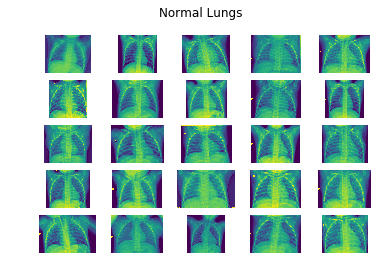

In [0]:
import random
import os
import matplotlib.pyplot as plt
normal_img = os.listdir('chest_xray/train/NORMAL/')
random = random.sample(normal_img,25)
f,ax = plt.subplots(5,5)

for i in range(0,25):
    im = plt.imread('chest_xray/train/NORMAL/'+random[i])
    ax[i//5,i%5].imshow(im)
    ax[i//5,i%5].axis('off')
f.suptitle('Normal Lungs')
plt.show()

In [0]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.models import Sequential

base_model=MobileNet( weights='imagenet',include_top=False,input_shape=(224,224,3)) #imports the mobilenet model and discards the last 1000 neuron layer.

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
x=base_model.output
x=GlobalAveragePooling2D()(x)

x=Dense(128,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dropout(0.2)(x)
x=Dense(64,activation='relu')(x) #dense layer 2

x=Dense(12,activation='relu')(x) #dense layer 3

preds=Dense(2,activation='softmax')(x) #final layer with softmax activation


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model=Model(inputs=base_model.input,outputs=preds)
for layer in model.layers[:-5]:
    layer.trainable=False
for layer in model.layers[-5:]:
    layer.trainable=True

In [0]:
from keras.optimizers import Adam
from keras.callbacks import  EarlyStopping
import keras
Adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-5, amsgrad=False)
# es = EarlyStopping(patience=3)
Adam

In [0]:
model.compile(optimizer=Adam,loss='binary_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [0]:
step_size_train=train_generator.n//train_generator.batch_size
step_size_test=test_generator.n//test_generator.batch_size
#viszualization

# img_path='chest_xray/val/BACTERIA/person1946_bacteria_4874.jpeg'
# img = image.load_img(img_path,target_size=(224,224))


# img_tensor = image.img_to_array(img)
# img_tensor = np.expand_dims(img_tensor, axis=0)
# img_tensor /= 255.
# plt.imshow(img_tensor[0])
# plt.show()
# print(img_tensor.shape)


In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, EarlyStopping(patience=5, monitor='val_loss')]

In [0]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=step_size_train,
                            validation_data=val_generator,validation_steps=step_size_test,callbacks=callbacks_list,epochs=30)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
87/87 [==============================] - 572s 7s/step - loss: 0.4449 - acc: 0.7681 - val_loss: 0.5487 - val_acc: 0.7500

Epoch 00001: val_loss improved from inf to 0.54866, saving model to weights-improvement-01-0.75.hdf5
Epoch 2/30
87/87 [==============================] - 538s 6s/step - loss: 0.2901 - acc: 0.8831 - val_loss: 0.5629 - val_acc: 0.7667

Epoch 00002: val_loss did not improve from 0.54866
Epoch 3/30
87/87 [==============================] - 538s 6s/step - loss: 0.2442 - acc: 0.9029 - val_loss: 0.5292 - val_acc: 0.7580

Epoch 00003: val_loss improved from 0.54866 to 0.52921, saving model to weights-improvement-03-0.76.hdf5
Epoch 4/30
87/87 [==============================] - 544s 6s/step - loss: 0.2137 - acc: 0.9218 - val_loss: 0.4538 - val_acc: 0.7883

Epoch 00004: val_loss improved from 0.52921 to 0.45380, saving model to weights-improvement-04-0.79.hdf5
Epoch 5/30
87/87 [==============================] - 539s 6s/st

In [0]:
predgen = model.predict_generator(val_generator, steps=len(val_generator), verbose=1) 
pred = np.argmax(predgen,axis = 1)
y_true=val_generator.classes

44/44 [==============================] - 245s 6s/step


CURRENT PREDICTION

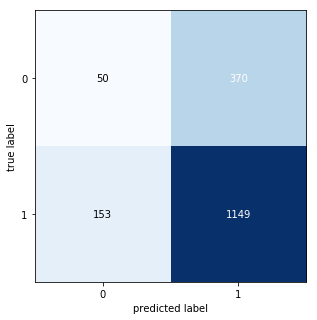

In [0]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#Transfer Learning with VGG16

In [0]:
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16, preprocess_input

In [0]:
from keras.layers import Dense,GlobalAveragePooling2D, Dropout
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

In [0]:

                  # Define path to the data directory
data_dir = Path('chest_xray/')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'

# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

In [0]:
import pandas as pd
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases_virus = pneumonia_cases_dir.glob('*virus*')
pneumonia_cases_bacteria = pneumonia_cases_dir.glob('*bacteria*')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1 for bacteria pneumonia and 2 vor virus
for img in pneumonia_cases_bacteria:
    train_data.append((img, 1))
for img in pneumonia_cases_virus:
    train_data.append((img, 2))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,chest_xray/train/NORMAL/IM-0365-0001.jpeg,0
1,chest_xray/train/NORMAL/NORMAL2-IM-1198-0001.jpeg,0
2,chest_xray/train/PNEUMONIA/person281_bacteria_...,1
3,chest_xray/train/PNEUMONIA/person1306_bacteria...,1
4,chest_xray/train/PNEUMONIA/person709_bacteria_...,1


In [0]:
import pandas as pd
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir_val = val_dir / 'NORMAL'
pneumonia_cases_dir_val = val_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases_val = normal_cases_dir_val.glob('*.jpeg')
pneumonia_cases_virus_val = pneumonia_cases_dir_val.glob('*virus*')
pneumonia_cases_bacteria_val = pneumonia_cases_dir_val.glob('*bacteria*')

# An empty list. We will insert the data into this list in (img_path, label) format
val_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases_val:
    val_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1 for bacteria pneumonia and 2 vor virus
for img in pneumonia_cases_bacteria_val:
    val_data.append((img, 1))
for img in pneumonia_cases_virus_val:
    val_data.append((img, 2))

# Get a pandas dataframe from the data we have in our list 
val_data = pd.DataFrame(val_data, columns=['image', 'label'],index=None)

# Shuffle the data 
val_data = val_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
val_data.head()

,image,label
0,chest_xray/val/PNEUMONIA/person1949_bacteria_4...,1
1,chest_xray/val/PNEUMONIA/person1950_bacteria_4...,1
2,chest_xray/val/PNEUMONIA/person1947_bacteria_4...,1
3,chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg,0
4,chest_xray/val/PNEUMONIA/person1946_bacteria_4...,1


In [0]:
import pandas as pd
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir_test = test_dir / 'NORMAL'
pneumonia_cases_dir_test = test_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases_test = normal_cases_dir_test.glob('*.jpeg')
pneumonia_cases_virus_test = pneumonia_cases_dir_test.glob('*virus*')
pneumonia_cases_bacteria_test = pneumonia_cases_dir_test.glob('*bacteria*')

# An empty list. We will insert the data into this list in (img_path, label) format
test_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases_test:
    test_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1 for bacteria pneumonia and 2 vor virus
for img in pneumonia_cases_bacteria_test:
    test_data.append((img, 1))
for img in pneumonia_cases_virus_test:
    test_data.append((img, 2))

# Get a pandas dataframe from the data we have in our list 
test_data = pd.DataFrame(test_data, columns=['image', 'label'],index=None)

# Shuffle the data 
test_data = test_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
test_data.head()

,image,label
0,chest_xray/test/PNEUMONIA/person1628_virus_282...,2
1,chest_xray/test/NORMAL/IM-0099-0001.jpeg,0
2,chest_xray/test/NORMAL/IM-0030-0001.jpeg,0
3,chest_xray/test/PNEUMONIA/person71_virus_132.jpeg,2
4,chest_xray/test/PNEUMONIA/person88_bacteria_43...,1


In [0]:

train_data= pd.DataFrame(train_data, dtype='str')
val_data= pd.DataFrame(val_data, dtype='str')
test_data= pd.DataFrame(test_data, dtype='str')

In [0]:
batch_size=32

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train,val = train_test_split(train_data, random_state = 111, test_size=0.33)

In [0]:
train.shape, val.shape

((3494, 2), (1722, 2))

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
train_generator = train_datagen.flow_from_dataframe(dataframe = train,x_col='image', y_col='label',target_size=(224,224),
                                                   color_mode='rgb', class_mode = 'categorical', 
                                                  batch_size = batch_size,
                                                 shuffle=True)

Found 3494 images belonging to 3 classes.


In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

val_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator=val_datagen.flow_from_dataframe(dataframe = val,x_col='image', y_col='label',target_size=(224,224),
                                                   color_mode='rgb', class_mode = 'categorical', 
                                                  batch_size = batch_size,
                                                 shuffle=False)

Found 1722 images belonging to 3 classes.


In [0]:
test_datagen=ImageDataGenerator(rescale=1. / 255) #included in our dependencies

test_generator=test_datagen.flow_from_dataframe(dataframe = test_data ,x_col='image', y_col='label',target_size=(224,224),
                                                   color_mode='rgb', class_mode = 'categorical', 
                                                  batch_size = batch_size,
                                                 shuffle=False)

Found 624 images belonging to 3 classes.


In [0]:
base_model = VGG16(include_top=False,
                  input_shape = (224,224,3),
                  weights = 'imagenet')

for layer in base_model.layers[:-12]:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

<keras.engine.input_layer.InputLayer object at 0x7fd64dc70cf8> False
<keras.layers.convolutional.Conv2D object at 0x7fd64dc70da0> False
<keras.layers.convolutional.Conv2D object at 0x7fd64dc70d30> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd64db90208> False
<keras.layers.convolutional.Conv2D object at 0x7fd64db90f98> False
<keras.layers.convolutional.Conv2D object at 0x7fd64db542b0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd64db645c0> False
<keras.layers.convolutional.Conv2D object at 0x7fd64db64080> True
<keras.layers.convolutional.Conv2D object at 0x7fd64db18160> True
<keras.layers.convolutional.Conv2D object at 0x7fd64db2c208> True
<keras.layers.pooling.MaxPooling2D object at 0x7fd64dac8f28> True
<keras.layers.convolutional.Conv2D object at 0x7fd64dac8ba8> True
<keras.layers.convolutional.Conv2D object at 0x7fd64daf4a90> True
<keras.layers.convolutional.Conv2D object at 0x7fd64daa2160> True
<keras.layers.pooling.MaxPooling2D object at 0x7fd64da399e8> True
<

In [0]:
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [0]:
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping,EarlyStopping,TensorBoard,ReduceLROnPlateau,CSVLogger,LearningRateScheduler
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

lrsched = LearningRateScheduler(step_decay,verbose=1)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.8,
    patience=5,
    verbose=1, 
    mode='auto',
    min_delta=0.0001, 
    cooldown=1, 
    min_lr=0.0001
)

callbacks = [checkpoint,tensorboard,earlystop,csvlogger,reduce]

In [0]:
# opt = SGD(lr=1e-4,momentum=0.95)
opt1 = Adam(lr=1e-4)


model.compile(
    loss='categorical_crossentropy',
    optimizer=opt1,
    metrics=['accuracy']
)
    

In [0]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=300,
                            validation_data=val_generator,validation_steps=300,callbacks=callbacks,epochs=50)

Epoch 1/50
300/300 [==============================] - 312s 1s/step - loss: 0.7112 - acc: 0.6641 - val_loss: 0.5430 - val_acc: 0.7660

Epoch 00001: val_loss improved from inf to 0.54305, saving model to ./base.model
Epoch 2/50
300/300 [==============================] - 303s 1s/step - loss: 0.5426 - acc: 0.7638 - val_loss: 0.5777 - val_acc: 0.7562

Epoch 00002: val_loss did not improve from 0.54305
Epoch 3/50
300/300 [==============================] - 301s 1s/step - loss: 0.4859 - acc: 0.7892 - val_loss: 0.5195 - val_acc: 0.7833

Epoch 00003: val_loss improved from 0.54305 to 0.51948, saving model to ./base.model
Epoch 4/50
300/300 [==============================] - 297s 990ms/step - loss: 0.4392 - acc: 0.8094 - val_loss: 0.4871 - val_acc: 0.8019

Epoch 00004: val_loss improved from 0.51948 to 0.48706, saving model to ./base.model
Epoch 5/50
300/300 [==============================] - 304s 1s/step - loss: 0.4328 - acc: 0.8098 - val_loss: 0.5489 - val_acc: 0.7800

Epoch 00005: val_loss did

In [0]:
predgen_val2 = model.predict_generator(val_generator, steps=len(val_generator), verbose=1) 
predgen_val_argmax2 = np.argmax(predgen_val2,axis = 1)
y_val2=val_generator.classes

predgen_test2 = model.predict_generator(test_generator, steps=len(test_generator), verbose=1) 
predgen_test_argmax2 = np.argmax(predgen_test2,axis = 1)
y_true2=test_generator.classes

20/20 [==============================] - 7s 338ms/step


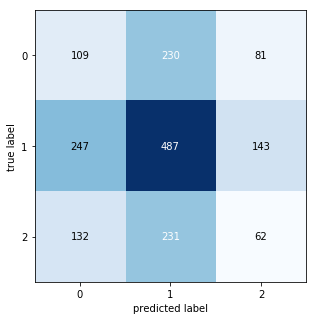

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
CM = confusion_matrix(y_val, predgen_val_argmax)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [0]:
import h5py

hf = h5py.File('data_xray_val_test_3classes_vgg16_2.h5', 'w')

hf.create_dataset('vel_pred_3classes', data=predgen_val2, compression="gzip", compression_opts=9)
hf.create_dataset('y_val_true_3classes', data=y_val2, compression="gzip", compression_opts=9)
hf.create_dataset('test_pred_3classes', data=predgen_test2, compression="gzip", compression_opts=9)
hf.create_dataset('y_test_true_3classes', data=y_true2, compression="gzip", compression_opts=9)


hf.close()

##VGG16 256/128 layers

In [0]:
# predgen_val = model.predict_generator(val_generator, steps=len(val_generator), verbose=1) 
# predgen_val_argmax = np.argmax(predgen_val,axis = 1)
# y_val=val_generator.classes

# predgen_test = model.predict_generator(test_generator, steps=len(test_generator), verbose=1) 
# predgen_test_argmax = np.argmax(predgen_test,axis = 1)
# y_true=test_generator.classes

20/20 [==============================] - 8s 409ms/step


model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

In [0]:
import h5py

hf = h5py.File('data_xray_val_test_3classes_vgg16.h5', 'w')

hf.create_dataset('vel_pred_3classes', data=predgen_val, compression="gzip", compression_opts=9)
hf.create_dataset('y_val_true_3classes', data=y_val, compression="gzip", compression_opts=9)
hf.create_dataset('test_pred_3classes', data=predgen_test, compression="gzip", compression_opts=9)
hf.create_dataset('y_test_true_3classes', data=y_true, compression="gzip", compression_opts=9)


hf.close()

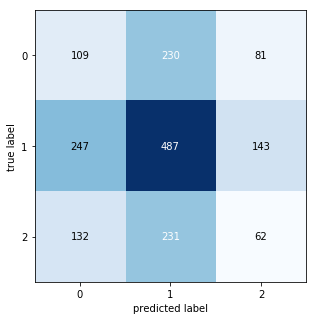

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
CM = confusion_matrix(y_val, predgen_val_argmax)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#Without transfer learning

In [0]:
batch_size=32

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, Dropout,MaxPool2D
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
import tensorflow as tf

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
        rotation_range=5,
        width_shift_range=0.3,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
train_generator = train_datagen.flow_from_dataframe(dataframe = train,x_col='image', y_col='label',target_size=(128, 128),
                                                  class_mode = 'categorical', 
                                                  batch_size = batch_size,
                                                 shuffle=True)

Found 3494 images belonging to 3 classes.


In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator=val_datagen.flow_from_dataframe(dataframe = val,x_col='image', y_col='label',target_size=(128, 128),
                                                   class_mode = 'categorical', 
                                                  batch_size = batch_size,
                                                 shuffle=False)

Found 1722 images belonging to 3 classes.


In [0]:
test_datagen=ImageDataGenerator(rescale = 1./255) #included in our dependencies

test_generator=test_datagen.flow_from_dataframe(dataframe = test_data ,x_col='image', y_col='label',target_size=(128, 128),
                                                   class_mode = 'categorical', 
                                                  batch_size = batch_size,
                                                 shuffle=False)

Found 624 images belonging to 3 classes.


In [0]:
model = Sequential([
    Conv2D(128, (3,3), activation = 'relu', input_shape = (128,128,3)),
    MaxPool2D(2, 2),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPool2D(2, 2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPool2D(2, 2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.2),
    Dense(256, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(3, activation = 'softmax')])

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, EarlyStopping(patience=5, monitor='val_loss')]

In [0]:
step_size_train=train_generator.n//train_generator.batch_size
step_size_test=test_generator.n//test_generator.batch_size

In [0]:
from keras.optimizers import Adam
from keras.callbacks import  EarlyStopping
import keras
Adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-5, amsgrad=False)
# es = EarlyStopping(patience=3)
Adam

In [0]:
model.compile(optimizer=Adam,loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 61, 61, 64)        73792     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
__________

In [0]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=step_size_train,
                            validation_data=val_generator,validation_steps=step_size_test,callbacks=callbacks_list,epochs=30)

Epoch 1/30
109/109 [==============================] - 54s 497ms/step - loss: 1.0576 - acc: 0.4676 - val_loss: 0.9997 - val_acc: 0.5332

Epoch 00001: val_loss improved from inf to 0.99971, saving model to weights-improvement-01-0.53.hdf5
Epoch 2/30
109/109 [==============================] - 46s 419ms/step - loss: 0.9778 - acc: 0.5472 - val_loss: 0.9972 - val_acc: 0.5115

Epoch 00002: val_loss improved from 0.99971 to 0.99721, saving model to weights-improvement-02-0.51.hdf5
Epoch 3/30
109/109 [==============================] - 51s 469ms/step - loss: 0.9062 - acc: 0.5971 - val_loss: 0.8034 - val_acc: 0.6349

Epoch 00003: val_loss improved from 0.99721 to 0.80340, saving model to weights-improvement-03-0.63.hdf5
Epoch 4/30
109/109 [==============================] - 51s 466ms/step - loss: 0.8237 - acc: 0.6452 - val_loss: 0.8208 - val_acc: 0.6412

Epoch 00004: val_loss did not improve from 0.80340
Epoch 5/30
109/109 [==============================] - 49s 454ms/step - loss: 0.7630 - acc: 0.6

In [0]:
predgen_without_transfer_learning = model.predict_generator(test_generator, steps=len(test_generator), verbose=1) 
pred_without_transfer_learning = np.argmax(predgen_without_transfer_learning,axis = 1)
y_true=test_generator.classes

20/20 [==============================] - 12s 623ms/step


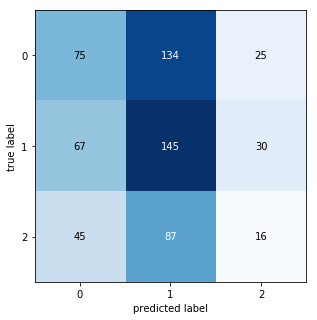

In [0]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_true, pred_without_transfer_learning)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#Fast.ai

##Create the model

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
bs =64

In [0]:
## Declaring path of dataset
path_img = Path('chest_xray/')
## Loading data 
data = ImageDataBunch.from_folder(path=path_img, train='train', valid_pct=0.33, test='test', ds_tfms=get_transforms(),size=224, bs=bs, classes = ['NORMAL', 'PNEUMONIA'])
## Normalizing data based on Image net parameters
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (3924 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: chest_xray;

Valid: LabelList (1932 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,NORMAL
Path: chest_xray;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: chest_xray

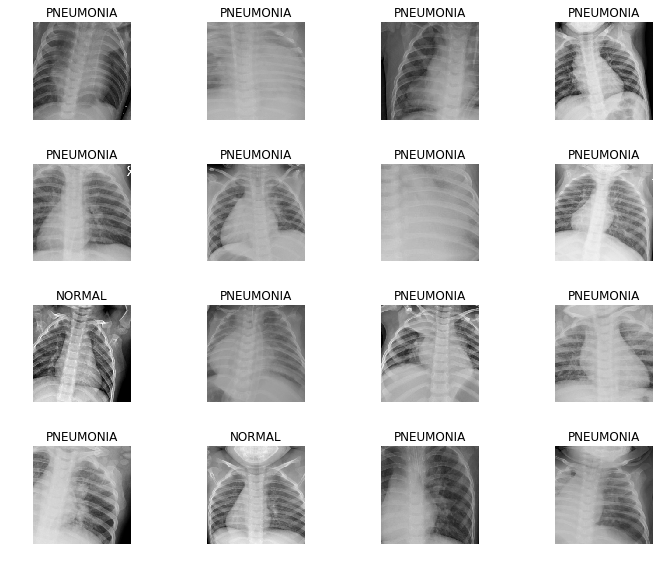

In [0]:
data.show_batch(rows=4, figsize=(10,8))

In [0]:
print(data.classes)
len(data.classes),data.c

['NORMAL', 'PNEUMONIA']


(2, 2)

In [0]:
## To create a ResNET 50 with pretrained weights
learn = create_cnn(data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,error_rate,time
0,0.235230,0.125900,0.041408,03:48
1,0.185719,0.113073,0.042443,03:47
2,0.136244,0.150825,0.050725,03:45
3,0.105337,0.086174,0.031056,03:47


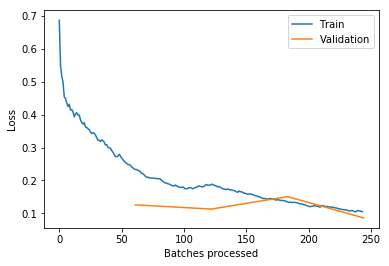

In [0]:
learn.fit_one_cycle(4, 1e-2)
learn.recorder.plot_losses()
plt.show()

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

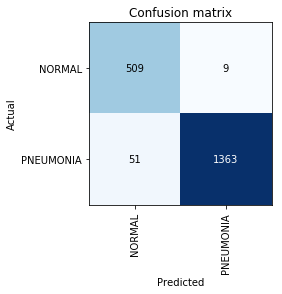

In [0]:
interp.plot_confusion_matrix()
#confussion matrix for validation

###check model on test data

In [0]:
## Declaring path of dataset
path_img = Path('chest_xray/')
## Loading data 
data_test = ImageDataBunch.from_folder(path=path_img, train='train', valid='test', ds_tfms=get_transforms(),size=224, bs=bs, classes = ['NORMAL', 'PNEUMONIA'])
## Normalizing data based on Image net parameters
data_test.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: chest_xray;

Valid: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: chest_xray;

Test: None

In [0]:
## To create a ResNET 50 with pretrained weights
learn = create_cnn(data_test, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,error_rate,time
0,0.211377,0.292877,0.086538,04:01
1,0.138676,0.576374,0.211538,03:57
2,0.099568,0.253007,0.065705,03:55
3,0.070601,0.274599,0.078526,03:55


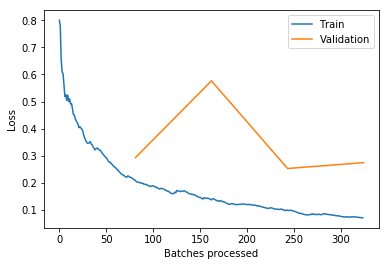

In [0]:
learn.fit_one_cycle(4, 1e-2)
learn.recorder.plot_losses()
plt.show()

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

##Results for test data (metrics) Pneumonia vs Normal

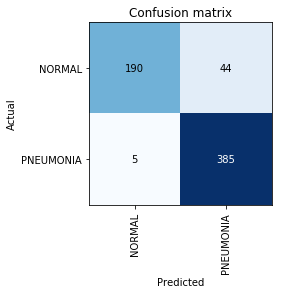

In [0]:
interp.plot_confusion_matrix()
#confussion matrix for test

In [0]:
y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [0]:
from sklearn.metrics import roc_auc_score, cohen_kappa_score, confusion_matrix

In [0]:
import numpy as np

In [0]:
#cohen kappa
cohen_kappa_score(y, np.argmax(preds, axis=1))

0.8267020335985853

In [0]:
#cohen kappa
roc_auc_score(y, np.argmax(preds, axis=1))

0.8995726495726496

In [0]:
tn, fp, fn, tp = confusion_matrix(y, np.argmax(preds, axis=1)).ravel()

In [0]:
sensitivity=(tp/(tp+fn))
specificity=(tn/(tn+fp))
print('sensitivity:',sensitivity, 'specificity:', specificity, end='\n')

sensitivity: 0.9871794871794872 specificity: 0.811965811965812


#3 classes classification with fast.ai

##preparing data (sort in folders fo input to 3 classes classification)

In [0]:
import shutil

In [0]:
def movefile(path1,files,path2):
  return [shutil.move(k, path2) for k in [path1 + i for i in files] ]

In [0]:
import os

FileNotFoundError: ignored

In [0]:
os.mkdir('chest_xray/test/BACTERIA')
movefile('chest_xray/test/PNEUMONIA/', [i for i in os.listdir('chest_xray/test/PNEUMONIA/') if 'bacteria' in i], 'chest_xray/test/BACTERIA/')
os.rename('chest_xray/test/PNEUMONIA', 'chest_xray/test/VIRUS')
os.mkdir('chest_xray/train/BACTERIA') 
movefile('chest_xray/train/PNEUMONIA/', [i for i in os.listdir('chest_xray/train/PNEUMONIA/') if 'bacteria' in i], 'chest_xray/train/BACTERIA/')
os.rename('chest_xray/train/PNEUMONIA', 'chest_xray/train/VIRUS')
os.rename('chest_xray/val/PNEUMONIA', 'chest_xray/val/BACTERIA')

In [0]:
# os.rename('chest_xray/train/PNEUMONIA', 'chest_xray/train/VIRUS')
# os.rename('chest_xray/val/PNEUMONIA', 'chest_xray/val/BACTERIA')

##Model for 3 classes

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
bs =64

In [0]:
## Declaring path of dataset
path_img = Path('chest_xray/')
## Loading data 
data = ImageDataBunch.from_folder(path=path_img, train='train', valid_pct=0.33, test='test', ds_tfms=get_transforms(),size=224, bs=bs, classes = ['NORMAL', 'BACTERIA', 'VIRUS'])
## Normalizing data based on Image net parameters
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (3924 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
BACTERIA,BACTERIA,BACTERIA,BACTERIA,BACTERIA
Path: chest_xray;

Valid: LabelList (1932 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
VIRUS,BACTERIA,VIRUS,NORMAL,NORMAL
Path: chest_xray;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: chest_xray

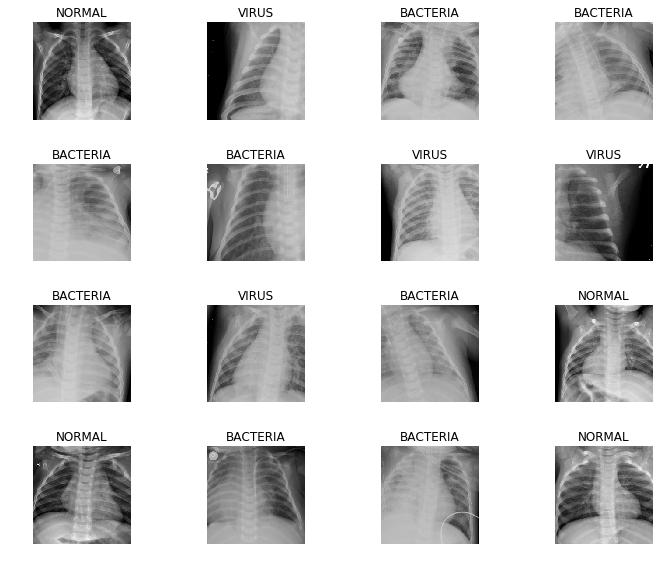

In [0]:
data.show_batch(rows=4, figsize=(10,8))

In [0]:
print(data.classes)
len(data.classes),data.c

['NORMAL', 'BACTERIA', 'VIRUS']


(3, 3)

In [0]:
## To create a ResNET 50 with pretrained weights
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 90328055.59it/s]


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.754049,0.672543,0.244824,0.755176,03:46
1,0.614520,0.499196,0.217909,0.782091,03:45
2,0.520012,0.419606,0.175466,0.824534,03:45
3,0.464709,0.429708,0.178571,0.821429,03:45


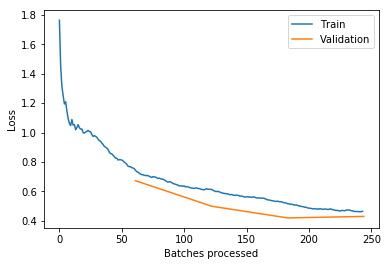

In [0]:
learn.fit_one_cycle(4, 1e-2)
learn.recorder.plot_losses()
plt.show()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


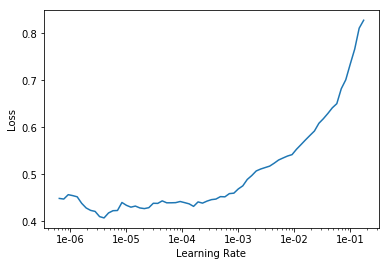

In [0]:
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.426197,0.416466,0.173395,0.826605,03:47
1,0.411707,0.407889,0.169772,0.830228,03:47
2,0.404725,0.410265,0.174431,0.825569,03:48
3,0.400189,0.402816,0.174948,0.825052,03:45


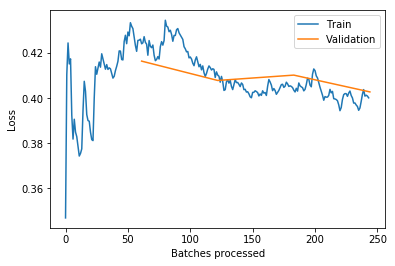

In [0]:

learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))
learn.recorder.plot_losses()
plt.show()

In [0]:
preds2_val,y2_val,losses2_val = learn.get_preds(with_loss=True)
interp2_val = ClassificationInterpretation(learn, preds2_val, y2_val, losses2_val)

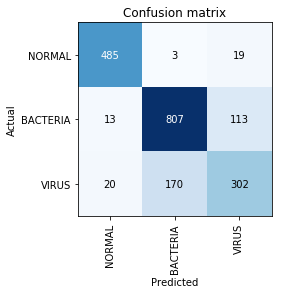

In [0]:
interp2_val.plot_confusion_matrix()
#confussion matrix for validation for e-6 e-4

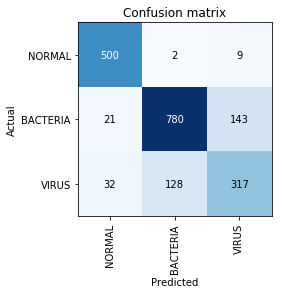

In [0]:
# interp.plot_confusion_matrix()
#confussion matrix for validation for e-4

###Check on test data

In [0]:
## Declaring path of dataset
path_img = Path('chest_xray/')
## Loading data 
data_test = ImageDataBunch.from_folder(path=path_img, train='train', valid='test', ds_tfms=get_transforms(),size=224, bs=bs,  classes = ['NORMAL', 'BACTERIA', 'VIRUS'])
## Normalizing data based on Image net parameters
data_test.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
BACTERIA,BACTERIA,BACTERIA,BACTERIA,BACTERIA
Path: chest_xray;

Valid: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
BACTERIA,BACTERIA,BACTERIA,BACTERIA,BACTERIA
Path: chest_xray;

Test: None

In [0]:
## To create a ResNET 50 with pretrained weights
learn = create_cnn(data_test, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,error_rate,time
0,1.494918,1.214010,0.631410,03:52
1,1.356463,1.005062,0.490385,03:51
2,1.185968,0.870423,0.400641,03:50
3,1.057463,0.785353,0.350962,03:51
4,1.002839,0.748104,0.315705,03:50
5,0.966313,0.735089,0.301282,03:50
6,0.950647,0.721235,0.301282,03:48
7,0.959742,0.715801,0.290064,03:51


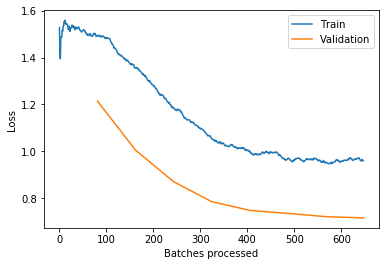

In [0]:

learn.fit_one_cycle(8, 5e-6)
learn.recorder.plot_losses()
plt.show()

In [0]:
preds2,y2,losses2 = learn.get_preds(with_loss=True)
interp2 = ClassificationInterpretation(learn, preds2, y2, losses2)

##Results for test data (metrics) 3 classes

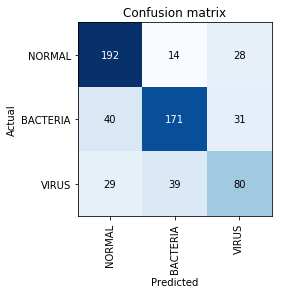

In [0]:
interp2.plot_confusion_matrix()
#confussion matrix for test

In [0]:
from sklearn.metrics import accuracy_score,roc_auc_score, cohen_kappa_score, confusion_matrix

In [0]:
import numpy as np

In [0]:
accuracy_score(y2, np.argmax(preds2, axis=1))

0.7099358974358975

pneum vs norm

In [0]:
roc_auc_score(y2_norm_vs_pneum, preds2_argmax_norm_vs_pneum)

ValueError: ignored

##Fast.ai bacteri vs virus prediction

In [0]:
## Declaring path of dataset
path_img = Path('chest_xray/')
## Loading data 
data = ImageDataBunch.from_folder(path=path_img, train='train', valid_pct=0.33, test='test', ds_tfms=get_transforms(),size=224, bs=bs, classes = ['BACTERIA', 'VIRUS'])
## Normalizing data based on Image net parameters
data.normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your train set contained the following unknown labels, the corresponding items have been discarded.
NORMAL
  if getattr(ds, 'warn', False): warn(ds.warn)
/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
NORMAL
  if getattr(ds, 'warn', False): warn(ds.warn)


ImageDataBunch;

Train: LabelList (2863 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
BACTERIA,BACTERIA,BACTERIA,BACTERIA,BACTERIA
Path: chest_xray;

Valid: LabelList (1410 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
VIRUS,VIRUS,BACTERIA,BACTERIA,BACTERIA
Path: chest_xray;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: chest_xray

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

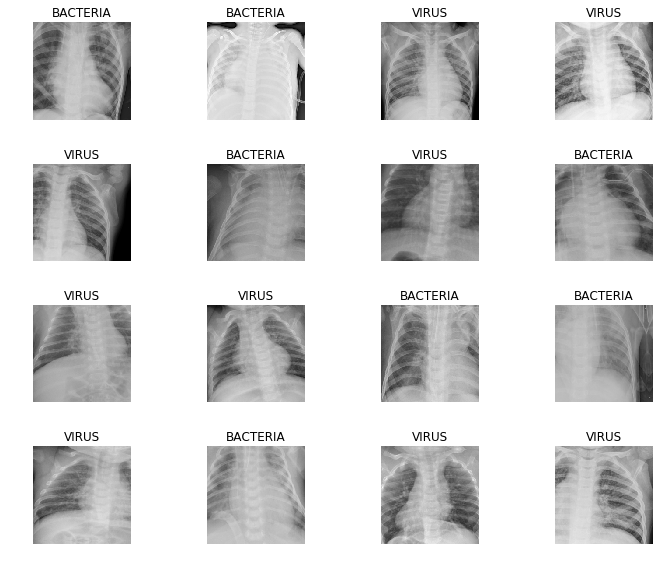

In [0]:
data.show_batch(rows=4, figsize=(10,8))

In [0]:
print(data.classes)
len(data.classes),data.c

['BACTERIA', 'VIRUS']


(2, 2)

In [0]:
## To create a ResNET 50 with pretrained weights
learn = create_cnn(data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,error_rate,time
0,0.710009,0.581436,0.273759,02:17
1,0.604543,0.592714,0.282979,02:16
2,0.553531,0.473498,0.224113,02:16
3,0.502004,0.472651,0.215603,02:15


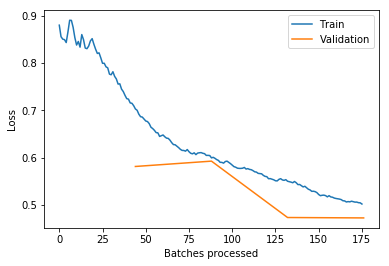

In [0]:
learn.fit_one_cycle(4, 1e-2)
learn.recorder.plot_losses()
plt.show()

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

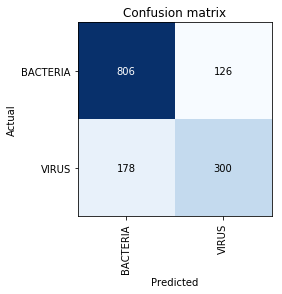

In [0]:
interp.plot_confusion_matrix()
#confussion matrix for validation

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


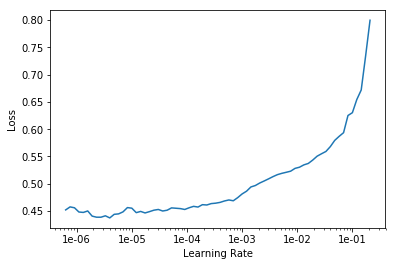

In [0]:
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

###check model on test data

In [0]:
## Declaring path of dataset
path_img = Path('chest_xray/')
## Loading data 
data_test = ImageDataBunch.from_folder(path=path_img, train='train', valid='test', ds_tfms=get_transforms(),size=224, bs=bs, classes = ['BACTERIA', 'VIRUS'])
## Normalizing data based on Image net parameters
data_test.normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your train set contained the following unknown labels, the corresponding items have been discarded.
NORMAL
  if getattr(ds, 'warn', False): warn(ds.warn)
/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
NORMAL
  if getattr(ds, 'warn', False): warn(ds.warn)


ImageDataBunch;

Train: LabelList (3875 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
BACTERIA,BACTERIA,BACTERIA,BACTERIA,BACTERIA
Path: chest_xray;

Valid: LabelList (390 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
BACTERIA,BACTERIA,BACTERIA,BACTERIA,BACTERIA
Path: chest_xray;

Test: None

In [0]:
## To create a ResNET 50 with pretrained weights
learn = create_cnn(data_test, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,error_rate,time
0,1.058026,0.857456,0.510256,02:24
1,1.057271,0.852895,0.523077,02:23
2,1.049871,0.833805,0.507692,02:23
3,1.032659,0.830156,0.505128,02:23


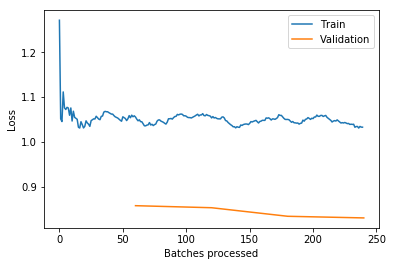

In [0]:
learn.fit_one_cycle(4, 1e-6)
learn.recorder.plot_losses()
plt.show()

epoch,train_loss,valid_loss,error_rate,time
0,0.816325,0.412125,0.158974,02:24
1,0.644228,0.404406,0.176923,02:22
2,0.584197,0.355651,0.148718,02:23
3,0.554308,0.296156,0.100000,02:24
4,0.514557,0.261421,0.094872,02:22
5,0.487714,0.274677,0.092308,02:24
6,0.456544,0.253599,0.069231,02:21
7,0.435245,0.234922,0.069231,02:24


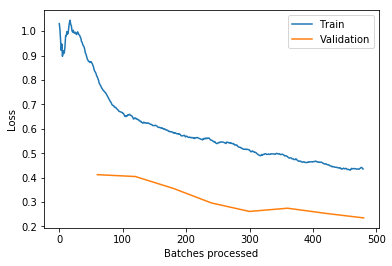

In [0]:
learn.fit_one_cycle(8, 1e-2)
learn.recorder.plot_losses()
plt.show()

In [0]:
preds3,y3,losses3 = learn.get_preds(with_loss=True)
interp3 = ClassificationInterpretation(learn, preds3, y3, losses3)

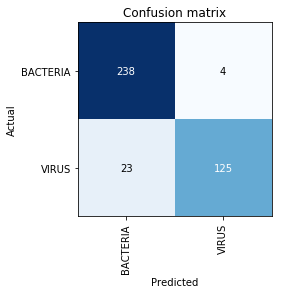

In [0]:
interp3.plot_confusion_matrix()
#confussion matrix for test

In [0]:
from sklearn.metrics import roc_auc_score, cohen_kappa_score, confusion_matrix, accuracy_score

In [0]:
import numpy as np

In [0]:
accuracy_score(y3, np.argmax(preds3, axis=1))

0.9307692307692308

In [0]:
#cohen kappa
cohen_kappa_score(y3, np.argmax(preds3, axis=1))

0.8492397560347049

In [0]:
#cohen kappa
roc_auc_score(y3, np.argmax(preds3, axis=1))

0.91403283448738

In [0]:
tn, fp, fn, tp = confusion_matrix(y3, np.argmax(preds3, axis=1)).ravel()

In [0]:
sensitivity=(tp/(tp+fn))
specificity=(tn/(tn+fp))
print('sensitivity:',sensitivity, 'specificity:', specificity, end='\n')

sensitivity: 0.8445945945945946 specificity: 0.9834710743801653
